In [218]:
from scipy import special
import numpy as np

In [219]:
hubble=68
ascale=206264.806 # arcseconds per radian
from astropy.cosmology import FlatLambdaCDM
cosmo=FlatLambdaCDM(H0=hubble, Om0=0.3)
print cosmo,cosmo.age(0)
print cosmo.comoving_volume(6.5) #z=6.5
print cosmo.kpc_proper_per_arcmin(1.1).to('kpc/arcsec') #1arcseconds at z=1.1

FlatLambdaCDM(H0=68 km / (Mpc s), Om0=0.3, Tcmb0=2.725 K, Neff=3.04, m_nu=[ 0.  0.  0.] eV, Ob0=None) 13.8573145662 Gyr
2.75063274945e+12 Mpc3
8.41248887702 kpc / arcsec


In [220]:
print cosmo.kpc_proper_per_arcmin(1).to('kpc/arcsec')

8.24345772725 kpc / arcsec


Populating the interactive namespace from numpy and matplotlib


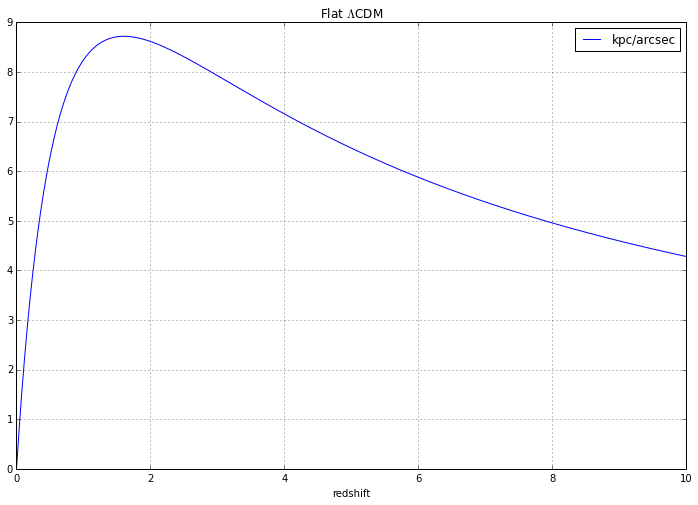

scale max  8.72036142958 kpc / arcsec  at redshift 1.61


In [221]:

z=np.arange(0.,10.,0.01)
scale=cosmo.kpc_proper_per_arcmin(z).to('kpc/arcsec')
lookback=cosmo.lookback_time(z)
#print scale
%pylab inline
pylab.figure(1,figsize=(12,8))
pylab.plot(z,scale,label="kpc/arcsec", rasterized=True)
#pylab.plot(z,lookback,label="Age/Gyr") #, rasterized=True)
pylab.xlabel('redshift')
pylab.title('Flat $\Lambda$CDM')
pylab.legend()
pylab.grid(True)
pylab.show()
print "scale max ", max(scale) , " at redshift", z[scale.argmax()]

In [222]:
z=1.61 ; m=0.3
c_h=299.8/hubble
print "Hubble radius",299.8/hubble,"Gpc"  #velocity of light/hubble
print "Hubble Time",978.0/hubble,"Gyr"
print "Critical density",0.0016*hubble*hubble,"*10^-30 g/cc"

Hubble radius 4.40882352941 Gpc
Hubble Time 14.3823529412 Gyr
Critical density 7.3984 *10^-30 g/cc


In [223]:
def Demianski(z,m):
    #Demianski approximation - good to z=10
    # assume flat
    w=-1 ; k=0 ; 
    l=1.0-m
    a=-1*w
    d1=-0.25*(2*k+3*m)**2 +0.5*(7*k+(13+a)*m) - (14*k+(28+5*a)*m)/(6*k+7*m+4*l)
    d2=1 + 0.25*(2*k+3*m)
    d3=((2*k+3*m)**2 - 4*(5*k+9*m) + 8*(14*k+(28+5*a)*m)/(6*k+7*m+4*l))/16.0
    #
    r=z/np.sqrt(d1*z**2 + (1+d2*z + d3*z**2)**2)  #dimensionless angular size
    #
    #print d1,d2,d3,r 
    das=r* 299.8/hubble # angular size distance in Gpc
    kpc_per_sec= das*1e6/ascale
    
    return kpc_per_sec

In [224]:
#  %loadpy ../Cosmology/Liu+Pen+Wikramsinghe+Ukwatta.py

In [225]:
"""
Wikramsinghe and Ukwatta

"""

def WandU(z,m):
    lam=1.-m

    def alpha(z,lam):
        a=1.+2.*(lam)/((1.-lam)*(1.+z)**3)
        return a

    def x(z,lam):
        x=np.log(alpha(z,lam) + np.sqrt(alpha(z,lam)**2 -1.))
        return x

    def psi(x):
        psi= 3*(x**.3333333)*(2**.66666666)*(1. -x**2/252. +x**4/21060.)
        return psi

    dlum= c_h*(1.+z)*(psi(x(0,lam)) - psi(x(z,lam)))\
      /(3*lam**0.16666* (1-lam)**0.33333)
    das=dlum/(1.+z)**2
    kpc_per_sec= das*1e6/ascale
    return kpc_per_sec

In [226]:
"""
Liu
very close to astropy
"""


def Liu(z,m):
    def xi(y):           #LIU
        v=1.62053*y**5 -6.34985*y**4 +8.41443*y**3 \
        -2.01328*y**2 -6.31293*y + 4.64111
        return v

    def y(x):
        xstar=0.40176
        l=1.-xstar
        y=(x-xstar)/l
        return y
   
    def T(s):           #LIU
        x=1/(1+s)
        t2=xi(y(x))
        t=np.sqrt(t2)
        return t


    s=((1.-m)/m)**(1./3.)
    #print s

    dlum=c_h*(1.+z)*(T(s)-T(s/(1.+z)))/math.sqrt(s*m)
    das=dlum/(1.+z)**2
    kpc_per_sec= das*1e6/ascale
    return kpc_per_sec

In [227]:
"""
Pen
closest to astropy
"""
def Pen(z,m):
    #print s
    def eta(a,m):       #PEN
        s=((1.-m)/m)**(1./3.)
        e=2*np.sqrt(s**3+1)*(1./a**4 -0.1540*s/(a**3) +0.4304*s*s/(a*a) \
                      +0.19097*s**3/a +0.066941*s**4)**(-0.125)
        return e

    dm=c_h*(eta(1,m)-eta(1./(1.+z),m))
    das=dm/(1.+z)          # angular size distance
    dlum=dm*(1.+z)         #luminosity distance
    kpc_per_sec= das*1e6/ascale
    return kpc_per_sec

In [228]:
def lampton(z,m):
    """
    See Lampton http://www.ssl.berkeley.edu/~mlampton/ComovingDistance.pdf
    valid for 0<z<2.5   ,  0.26 < Omega_m <0.28
    """
    a= 1.718*m
    b= 0.315*np.sqrt(m)
    scale=c_h
    DC=scale*z/(np.sqrt(1 + a*z + b*z*z)) # comoving distance in Gpc
    DAS=DC/(1+z)
    DLUM=DC*(1+z)
    das=DAS*1e6/ascale
    return das
print z,m,lampton(z,m)

1.61 0.3 8.73775640141


In [229]:
def AK(z,m):
    """
    Adachi and Kasai
    assumes a flat universe
    very close to astropy
    """
    def x(z,m):
        x=(1-m)/(m*(1+z)**3)
        return x
    def phi(x):
        # more digits from Baes
        phi=(1+1.320432205*x+0.4415222005*x**2 +0.02656247685*x**3)\
        /(1+1.39186078*x+0.512094674*x**2 +0.0394382061*x**3)
        return phi
    def da(z,m):
        dl=1/(np.sqrt(m)* (1+z))
        x0=x(0,m)
        x1=x(z,m)
        dl=2*dl*(phi(x0)- phi(x1)/np.sqrt(1+z))
        return dl
    das=da(z,m)
    das=das*299.8/hubble # now in Gpc
    kpc_per_sec= das*1e6/ascale
    return kpc_per_sec

In [230]:
def lamptonApprox(z):
    """
    See Lampton http://www.ssl.berkeley.edu/~mlampton/ComovingDistance.pdf
    valid for 0<z<infinty ,  0.26 < Omega_m <0.28 OK for z>2.5
    """
    scale=c_h
    DC=scale*z/np.sqrt(1+ 0.4704*z**1.3179 + 0.0854*z**2)
    DAS=DC/(1+z)
    das=DAS*1e6/ascale
    return das
print z,lamptonApprox(z)

1.61 9.09315871434


In [231]:
def baes(z,m):
    """
    Taken from Baes et al
    z=redshift
    m=omega_m
    space assumed flat
    """
    from numpy import vectorize
    s=((1-m)/m)**(1./3.)
    def T(x):
        f=np.sqrt(x/(1+x**3)) # a useful value
        tinf=special.gamma(1/6.)*special.gamma(1/3.)/(3*np.sqrt(np.pi)) # assymptotic value
        if x >1:
            t=tinf -f*special.hyp2f1(0.5,1,4/3., (1/(1+x**3)))
        else:
            t=2*f*special.hyp2f1(0.5,1,7/6., (x**3/(1+x**3)))
        return t
    Tv=vectorize(T)
    Dlum=((1+z)*c_h*(Tv(s) - Tv(s/(1+z))))/(np.sqrt(s*m))
    DAS=Dlum/(1+z)**2
    das=DAS*1e6/ascale
    return das # angular scale

In [232]:
print baes(1.61,0.3)

8.7218595275


In [233]:
print Liu(1.61, 0.3), Pen(1.61, 0.3), WandU(1.61,0.3), Demianski(1.61,0.3)\
, AK(1.61, 0.3), lampton(1.61,0.3)

8.70977223998 8.71799752073 8.72543440404 8.75193707708 8.72396585419 8.73775640141


In [234]:
def cdp(z,m):
    """
    cosmolopy
     needed a sudo pip install CosmoloPy
    """ 
    
    import cosmolopy.distance as cd
    cosmo = {'omega_M_0' : m, 'omega_lambda_0' : 1.0-m , 'h' : hubble/100.}
    cosmo = cd.set_omega_k_0(cosmo)
    #d_co = cd.comoving_distance(6, **cosmo)
    #print "Comoving distance to z=6 is %.1f Mpc" % (d_co)
    #Comoving distance to z=1 is 8017.8 Mpc
    d_as=cd.angular_diameter_distance(z,**cosmo) # Mpc
    kpc_per_sec=d_as*1e3/ascale
    return kpc_per_sec
print cdp(1.61,0.3)
z=np.arange(0.0,1.7,0.1)
print z,cdp(z, 0.3)

8.72164011368
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6] [ 0.          1.89853907  3.39670368  4.5853163   5.53096193  6.28374512
  6.8821236   7.35606083  7.72916967  8.02022405  8.24425724  8.4133789
  8.53739378  8.6242768   8.68054159  8.71152874  8.72163278]


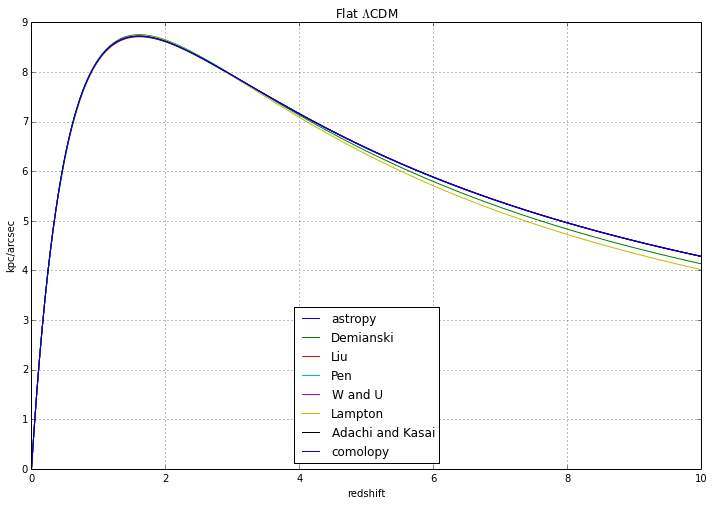

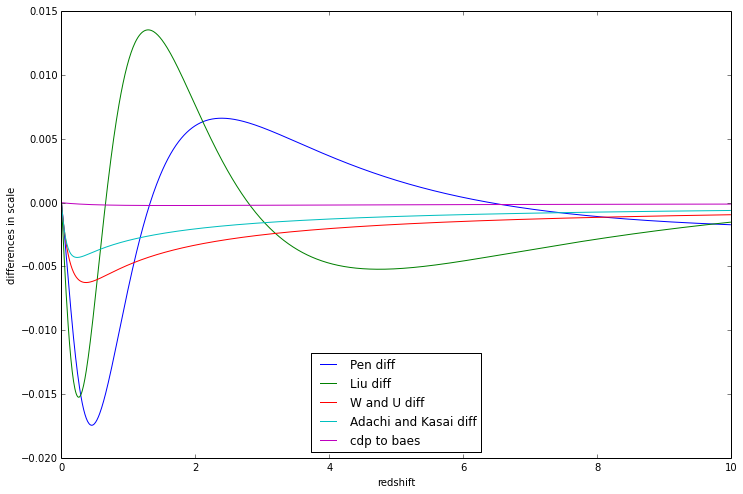

In [235]:
z=np.arange(0.0, 10. ,0.01)
#%pylab inline
m=0.3
pylab.figure(1,figsize=(12,8))
scale=cosmo.kpc_proper_per_arcmin(z).to('kpc/arcsec')
s=scale
pylab.plot(z,s,label="astropy")
pylab.plot(z,Demianski(z,m), label="Demianski")
pylab.plot(z,Liu(z,m),label="Liu")
pylab.plot(z,Pen(z,m),label="Pen")
pylab.plot(z,WandU(z,m),label="W and U")
pylab.plot(z,lampton(z,m),label="Lampton")
pylab.plot(z,AK(z,m),label="Adachi and Kasai")
pylab.plot(z,cdp(z,m),label='comolopy')
#pylab.plot(z,lamptonApprox(z),label="Lampton Approx")
pylab.xlabel('redshift')
pylab.ylabel('kpc/arcsec')
pylab.title('Flat $\Lambda$CDM')
pylab.legend(loc=8)
pylab.grid(True)
pylab.show()
#print "scale max ", max(scale) , " at redshift", z[scale.argmax()]
pylab.figure(2,figsize=(12,8))
pylab.plot(z,cdp(z,m) - Pen(z,m), label="Pen diff")
pylab.plot(z,cdp(z,m)-Liu(z,m),label="Liu diff")
pylab.plot(z,cdp(z,m) -WandU(z,m),label="W and U diff")
#pylab.plot(z,Demianski(z,m)-Pen(z,m), label="Demianski diff")
#pylab.plot(z,lampton(z,m)-Pen(z,m),label="Lampton diff")
#pylab.plot(z,lamptonApprox(z)-Pen(z,m),label="Lampton approx diff")
pylab.plot(z,cdp(z,m)-AK(z,m),label="Adachi and Kasai diff ")
pylab.plot(z,cdp(z,m)-baes(z,m),label="cdp to baes")
pylab.xlabel('redshift')
pylab.ylabel('differences in scale')
pylab.legend(loc=8)
pylab.show()